In [378]:
%matplotlib notebook

In [379]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates

In [380]:
crimes_df = "Chicago_Crimes_Data.csv"

crimes_df = pd.read_csv(crimes_df, encoding="utf=8")

crimes_df

,ID,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
0,11230736,9/1/2016 0:00,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2016,NaN,NaN
1,11267275,9/1/2016 0:00,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,False,2016,NaN,NaN
2,10666863,9/1/2016 0:00,820,THEFT,$500 AND UNDER,False,2016,41.910652,-87.666102
3,10669255,9/1/2016 0:00,266,CRIM SEXUAL ASSAULT,PREDATORY,False,2016,41.897852,-87.716391
4,10672804,9/1/2016 0:00,810,THEFT,OVER $500,False,2016,41.914627,-87.682031
...,...,...,...,...,...,...,...,...,...
711198,12870310,9/24/2022 17:00,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
711199,12870245,9/24/2022 23:58,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
711200,12870060,9/26/2022 9:00,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727
711201,12841629,9/27/2022 21:30,330,ROBBERY,AGGRAVATED,False,2022,41.879408,-87.631432


In [381]:
crimes_df = crimes_df.set_index(["ID"])
crimes_df

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11230736,9/1/2016 0:00,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2016,NaN,NaN
11267275,9/1/2016 0:00,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,False,2016,NaN,NaN
10666863,9/1/2016 0:00,820,THEFT,$500 AND UNDER,False,2016,41.910652,-87.666102
10669255,9/1/2016 0:00,266,CRIM SEXUAL ASSAULT,PREDATORY,False,2016,41.897852,-87.716391
10672804,9/1/2016 0:00,810,THEFT,OVER $500,False,2016,41.914627,-87.682031
...,...,...,...,...,...,...,...,...
12870310,9/24/2022 17:00,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
12870245,9/24/2022 23:58,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
12870060,9/26/2022 9:00,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727


In [382]:
crimes_df.count()

Date            711203
IUCR            711203
Primary Type    711203
Description     711203
Arrest          711203
Year            711203
Latitude        708527
Longitude       708527
dtype: int64

In [383]:
crimes_df = crimes_df.dropna(how='any')

In [384]:
crimes_df.count()

Date            708527
IUCR            708527
Primary Type    708527
Description     708527
Arrest          708527
Year            708527
Latitude        708527
Longitude       708527
dtype: int64

In [385]:
crimes_df.dtypes

Date             object
IUCR             object
Primary Type     object
Description      object
Arrest             bool
Year              int64
Latitude        float64
Longitude       float64
dtype: object

In [386]:
crimes_df

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
10666863,9/1/2016 0:00,820,THEFT,$500 AND UNDER,False,2016,41.910652,-87.666102
10669255,9/1/2016 0:00,266,CRIM SEXUAL ASSAULT,PREDATORY,False,2016,41.897852,-87.716391
10672804,9/1/2016 0:00,810,THEFT,OVER $500,False,2016,41.914627,-87.682031
10674857,9/1/2016 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2016,41.740114,-87.578202
10678497,9/1/2016 0:00,820,THEFT,$500 AND UNDER,False,2016,41.942517,-87.654188
...,...,...,...,...,...,...,...,...
12870310,9/24/2022 17:00,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
12870245,9/24/2022 23:58,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
12870060,9/26/2022 9:00,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727


In [387]:
crime_type = crimes_df["Primary Type"].unique()
crime_type


array(['THEFT', 'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE',
       'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE',
       'ASSAULT', 'BATTERY', 'CRIMINAL TRESPASS', 'CRIMINAL DAMAGE',
       'STALKING', 'BURGLARY', 'WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT',
       'ROBBERY', 'NARCOTICS', 'PUBLIC PEACE VIOLATION', 'INTIMIDATION',
       'ARSON', 'KIDNAPPING', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PROSTITUTION', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'CRIMINAL SEXUAL ASSAULT', 'PUBLIC INDECENCY',
       'OBSCENITY', 'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL (SUBJECT SPECIFIED)'],
      dtype=object)

In [388]:
crime_type = len(crimes_df["Primary Type"].unique())
crime_type

33

In [389]:
crime_type = pd.value_counts(crimes_df["Primary Type"])
crime_type

THEFT                                168856
BATTERY                              132698
CRIMINAL DAMAGE                       77541
ASSAULT                               52774
DECEPTIVE PRACTICE                    48478
OTHER OFFENSE                         46576
BURGLARY                              33381
NARCOTICS                             33193
MOTOR VEHICLE THEFT                   28966
ROBBERY                               28389
CRIMINAL TRESPASS                     18475
WEAPONS VIOLATION                     13972
OFFENSE INVOLVING CHILDREN             5629
PUBLIC PEACE VIOLATION                 3994
CRIM SEXUAL ASSAULT                    3429
INTERFERENCE WITH PUBLIC OFFICER       3262
SEX OFFENSE                            2612
PROSTITUTION                           1882
ARSON                                  1079
LIQUOR LAW VIOLATION                    585
STALKING                                546
KIDNAPPING                              492
GAMBLING                        

In [390]:
crimes_2016 = crimes_df[crimes_df["Year"] == 2016]
crimes_2016

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
10666863,9/1/2016 0:00,820,THEFT,$500 AND UNDER,False,2016,41.910652,-87.666102
10669255,9/1/2016 0:00,266,CRIM SEXUAL ASSAULT,PREDATORY,False,2016,41.897852,-87.716391
10672804,9/1/2016 0:00,810,THEFT,OVER $500,False,2016,41.914627,-87.682031
10674857,9/1/2016 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2016,41.740114,-87.578202
10678497,9/1/2016 0:00,820,THEFT,$500 AND UNDER,False,2016,41.942517,-87.654188
...,...,...,...,...,...,...,...,...
10801865,12/31/2016 23:54,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2016,41.752307,-87.619798
10801110,12/31/2016 23:55,2250,LIQUOR LAW VIOLATION,LIQUOR LICENSE VIOLATION,True,2016,41.936885,-87.664770
10802006,12/31/2016 23:55,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2016,41.886815,-87.625593


In [391]:
crime_2016 = pd.value_counts(crimes_2016["Primary Type"])
crime_2016

THEFT                                20792
BATTERY                              15506
CRIMINAL DAMAGE                      10140
DECEPTIVE PRACTICE                    6131
ASSAULT                               5799
OTHER OFFENSE                         5455
BURGLARY                              5259
ROBBERY                               4317
MOTOR VEHICLE THEFT                   4047
NARCOTICS                             3100
CRIMINAL TRESPASS                     2058
WEAPONS VIOLATION                     1150
OFFENSE INVOLVING CHILDREN             630
PUBLIC PEACE VIOLATION                 494
CRIM SEXUAL ASSAULT                    419
INTERFERENCE WITH PUBLIC OFFICER       314
SEX OFFENSE                            273
PROSTITUTION                           210
ARSON                                  162
STALKING                                75
KIDNAPPING                              58
LIQUOR LAW VIOLATION                    56
INTIMIDATION                            49
GAMBLING   

In [392]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [20792, 15506, 10140]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="b", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2016")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2016.png")

In [393]:
crimes_2017 = crimes_df[crimes_df["Year"] == 2017]
crimes_2017

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
10824428,1/1/2017 0:00,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,False,2017,41.808902,-87.599253
10827683,1/1/2017 0:00,810,THEFT,OVER $500,False,2017,41.979006,-87.906463
10801101,1/1/2017 0:00,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2017,41.759884,-87.597242
10801104,1/1/2017 0:00,486,BATTERY,DOMESTIC BATTERY SIMPLE,True,2017,41.774406,-87.635727
10801111,1/1/2017 0:00,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,True,2017,41.947226,-87.655523
...,...,...,...,...,...,...,...,...
11192239,12/31/2017 23:45,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2017,41.856427,-87.638893
11192254,12/31/2017 23:45,041A,BATTERY,AGGRAVATED: HANDGUN,False,2017,41.683369,-87.622830
11192540,12/31/2017 23:48,890,THEFT,FROM BUILDING,False,2017,41.895751,-87.623496


In [394]:
crime_2017 = pd.value_counts(crimes_2017["Primary Type"])
crime_2017

THEFT                                61746
BATTERY                              48002
CRIMINAL DAMAGE                      28697
ASSAULT                              18546
DECEPTIVE PRACTICE                   17653
OTHER OFFENSE                        16880
BURGLARY                             12662
ROBBERY                              11539
NARCOTICS                            11390
MOTOR VEHICLE THEFT                  11209
CRIMINAL TRESPASS                     6754
WEAPONS VIOLATION                     4662
OFFENSE INVOLVING CHILDREN            2065
PUBLIC PEACE VIOLATION                1486
CRIM SEXUAL ASSAULT                   1391
INTERFERENCE WITH PUBLIC OFFICER      1078
SEX OFFENSE                            908
PROSTITUTION                           729
ARSON                                  419
LIQUOR LAW VIOLATION                   191
KIDNAPPING                             188
GAMBLING                               187
STALKING                               179
INTIMIDATIO

In [395]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [61746, 48002, 28697]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="r", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2017")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")


#plt.savefig("Crimes of Chicago in 2017.png")

In [396]:
crimes_2018 = crimes_df.loc[crimes_df["Year"] == 2018]
crimes_2018

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11196173,1/1/2018 0:00,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,False,2018,41.756325,-87.709916
11198738,1/1/2018 0:00,820,THEFT,$500 AND UNDER,False,2018,41.881777,-87.620768
11212228,1/1/2018 0:00,810,THEFT,OVER $500,False,2018,41.695227,-87.642468
11220328,1/1/2018 0:00,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,True,2018,41.950778,-87.716502
11220367,1/1/2018 0:00,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,False,2018,41.816857,-87.690789
...,...,...,...,...,...,...,...,...
11552731,12/31/2018 23:55,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2018,41.751914,-87.647717
11552724,12/31/2018 23:56,440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,True,2018,41.857068,-87.657625
11552699,12/31/2018 23:57,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2018,41.740521,-87.647391


In [397]:
crime_2018 = pd.value_counts(crimes_2018["Primary Type"])
crime_2018

THEFT                                62467
BATTERY                              48545
CRIMINAL DAMAGE                      27463
ASSAULT                              19742
DECEPTIVE PRACTICE                   17746
OTHER OFFENSE                        16821
NARCOTICS                            12715
BURGLARY                             11430
MOTOR VEHICLE THEFT                   9832
ROBBERY                               9358
CRIMINAL TRESPASS                     6824
WEAPONS VIOLATION                     5409
OFFENSE INVOLVING CHILDREN            2028
PUBLIC PEACE VIOLATION                1352
INTERFERENCE WITH PUBLIC OFFICER      1298
CRIM SEXUAL ASSAULT                   1280
SEX OFFENSE                            999
PROSTITUTION                           715
ARSON                                  351
LIQUOR LAW VIOLATION                   265
GAMBLING                               198
STALKING                               196
KIDNAPPING                             170
INTIMIDATIO

In [398]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [62467, 48545, 27463]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="g", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2018")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2018.png")

In [399]:
crimes_2019 = crimes_df[crimes_df["Year"] == 2019]
crimes_2019

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11552667,1/1/2019 0:00,890,THEFT,FROM BUILDING,False,2019,41.889453,-87.627995
11552674,1/1/2019 0:00,910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2019,41.726566,-87.636066
11552709,1/1/2019 0:00,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2019,41.812780,-87.691894
11552758,1/1/2019 0:00,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2019,41.778565,-87.665464
11553168,1/1/2019 0:00,890,THEFT,FROM BUILDING,False,2019,41.898768,-87.624116
...,...,...,...,...,...,...,...,...
12006739,12/26/2019 10:59,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,True,2019,41.875812,-87.750410
12007706,12/27/2019 10:56,2014,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),True,2019,41.878588,-87.745876
12006723,12/27/2019 12:00,2024,NARCOTICS,POSSESS - HEROIN (WHITE),True,2019,41.860110,-87.726214


In [400]:
crime_2019 = pd.value_counts(crimes_2019["Primary Type"])
crime_2019

THEFT                                22087
BATTERY                              18599
CRIMINAL DAMAGE                      10020
ASSAULT                               7827
OTHER OFFENSE                         6857
DECEPTIVE PRACTICE                    6290
NARCOTICS                             5743
BURGLARY                              3480
MOTOR VEHICLE THEFT                   3455
ROBBERY                               2798
CRIMINAL TRESPASS                     2684
WEAPONS VIOLATION                     2368
OFFENSE INVOLVING CHILDREN             833
PUBLIC PEACE VIOLATION                 626
INTERFERENCE WITH PUBLIC OFFICER       551
SEX OFFENSE                            382
CRIM SEXUAL ASSAULT                    339
PROSTITUTION                           228
ARSON                                  128
STALKING                                83
CONCEALED CARRY LICENSE VIOLATION       75
LIQUOR LAW VIOLATION                    71
KIDNAPPING                              69
INTIMIDATIO

In [401]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [22087, 18599, 10020]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="orange", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2019")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2019.png")

In [402]:
crimes_2020 = crimes_df[crimes_df["Year"] == 2020]
crimes_2020

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
12016034,1/1/2020 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2020,41.915306,-87.686639
12220321,1/1/2020 0:00,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,False,2020,41.728192,-87.600985
12013828,1/1/2020 0:00,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,False,2020,41.812274,-87.748177
12019692,1/1/2020 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2020,41.940222,-87.669039
12016436,1/1/2020 7:00,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,2020,41.795247,-87.643584
...,...,...,...,...,...,...,...,...
12244533,12/13/2020 23:40,910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2020,41.747732,-87.596278
12244538,12/13/2020 23:40,430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,False,2020,41.734762,-87.670552
12244522,12/13/2020 23:40,291,CRIMINAL SEXUAL ASSAULT,ATTEMPT NON-AGGRAVATED,False,2020,41.772285,-87.625115


In [403]:
crime_2020 = pd.value_counts(crimes_2020["Primary Type"])
crime_2020

BATTERY                              1727
THEFT                                1455
CRIMINAL DAMAGE                      1003
ASSAULT                               716
DECEPTIVE PRACTICE                    545
BURGLARY                              508
OTHER OFFENSE                         468
MOTOR VEHICLE THEFT                   365
ROBBERY                               326
WEAPONS VIOLATION                     306
NARCOTICS                             218
CRIMINAL TRESPASS                     136
OFFENSE INVOLVING CHILDREN             54
SEX OFFENSE                            41
CRIMINAL SEXUAL ASSAULT                33
PUBLIC PEACE VIOLATION                 30
INTERFERENCE WITH PUBLIC OFFICER       20
ARSON                                  12
STALKING                               11
KIDNAPPING                              6
INTIMIDATION                            6
CONCEALED CARRY LICENSE VIOLATION       3
LIQUOR LAW VIOLATION                    2
GAMBLING                          

In [404]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [1727, 1455, 1003]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="pink", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2020")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2020.png")

In [405]:
crimes_2021 = crimes_df[crimes_df["Year"] == 2021]
crimes_2021

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
12345411,1/1/2021 0:00,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2021,41.827682,-87.665496
12449065,1/1/2021 0:00,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,False,2021,41.712933,-87.536489
12346533,1/5/2021 0:00,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,False,2021,41.729448,-87.563365
12265790,1/9/2021 15:59,1020,ARSON,BY FIRE,True,2021,41.973401,-87.672166
12346662,1/12/2021 10:15,810,THEFT,OVER $500,False,2021,41.851989,-87.689219
...,...,...,...,...,...,...,...,...
12541107,11/14/2021 22:45,560,ASSAULT,SIMPLE,False,2021,42.015416,-87.664883
12541124,11/14/2021 22:46,031A,ROBBERY,ARMED - HANDGUN,False,2021,41.855887,-87.672034
12541099,11/14/2021 22:58,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,True,2021,41.886320,-87.750388


In [406]:
crime_2021 = pd.value_counts(crimes_2021["Primary Type"])
crime_2021

BATTERY                              316
THEFT                                301
CRIMINAL DAMAGE                      214
ASSAULT                              143
DECEPTIVE PRACTICE                   103
OTHER OFFENSE                         92
WEAPONS VIOLATION                     77
MOTOR VEHICLE THEFT                   56
ROBBERY                               49
BURGLARY                              39
NARCOTICS                             27
CRIMINAL TRESPASS                     19
CRIMINAL SEXUAL ASSAULT               17
OFFENSE INVOLVING CHILDREN            17
SEX OFFENSE                            7
ARSON                                  6
PUBLIC PEACE VIOLATION                 6
INTIMIDATION                           3
STALKING                               2
KIDNAPPING                             1
CONCEALED CARRY LICENSE VIOLATION      1
OBSCENITY                              1
Name: Primary Type, dtype: int64

In [407]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [316, 301, 214]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="purple", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2021")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2021.png")

In [408]:
crimes_2022 = crimes_df[crimes_df["Year"] == 2022]
crimes_2022

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
12869739,2/1/2022 8:00,1121,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,False,2022,41.880304,-87.636978
12870099,3/1/2022 9:00,910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2022,41.810106,-87.692254
12687224,4/22/2022 16:07,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,False,2022,41.851504,-87.727635
12686346,4/30/2022 15:50,860,THEFT,RETAIL THEFT,True,2022,41.680693,-87.662446
12686357,5/1/2022 2:01,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,False,2022,41.766691,-87.611662
12686658,5/1/2022 20:52,1025,ARSON,AGGRAVATED,False,2022,41.811557,-87.669908
12687243,5/2/2022 14:21,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2022,41.866148,-87.726785
12698897,5/14/2022 14:30,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,True,2022,41.884335,-87.619164
12870256,6/1/2022 8:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2022,41.756016,-87.607776


In [409]:
crime_2022 = pd.value_counts(crimes_2022["Primary Type"])
crime_2022

DECEPTIVE PRACTICE                  10
THEFT                                8
CRIMINAL DAMAGE                      4
OTHER OFFENSE                        3
BATTERY                              3
BURGLARY                             3
CRIMINAL SEXUAL ASSAULT              2
SEX OFFENSE                          2
MOTOR VEHICLE THEFT                  2
OFFENSE INVOLVING CHILDREN           2
ROBBERY                              2
HOMICIDE                             1
ASSAULT                              1
ARSON                                1
INTERFERENCE WITH PUBLIC OFFICER     1
Name: Primary Type, dtype: int64

In [410]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [10, 8, 4]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="yellow", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2021")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2022.png")

In [411]:
x_axis = [1, 2, 3, 4, 5, 6]
labels = ["2016", "2017", "2018", "2019", "2020", "2021"]

In [412]:
theft = [20792, 61746, 62467, 22087, 1727, 316]
battery_crimes = [15506, 48002, 48545, 18599, 1455, 301]
criminal_damage = [10140, 28697, 27463, 10020, 1003, 214]

<IPython.core.display.Javascript object>


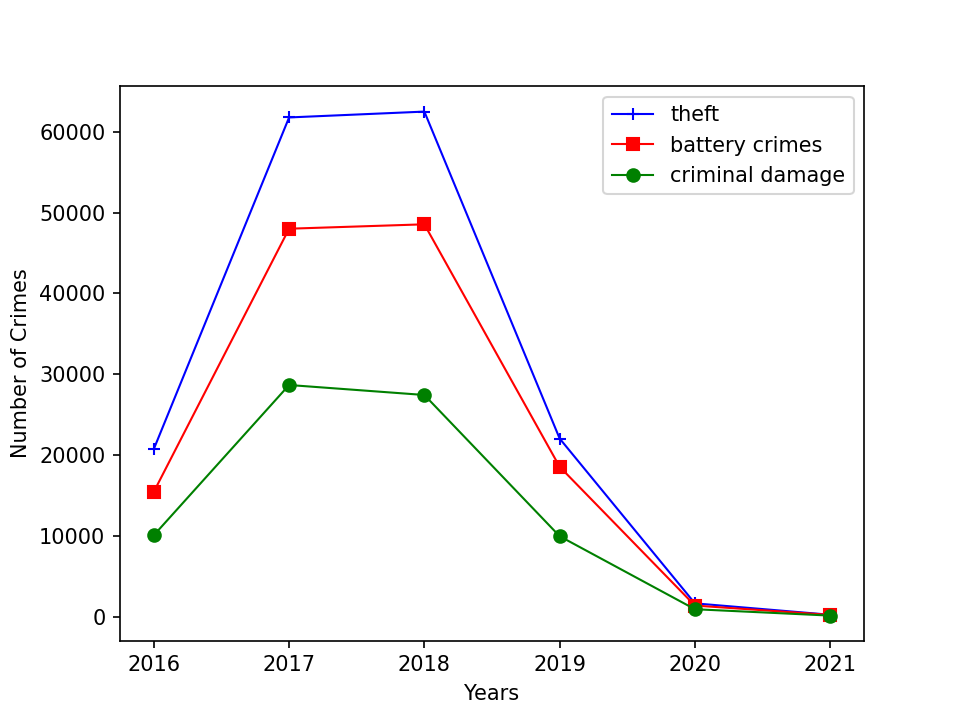

In [413]:
theft, = plt.plot(x_axis, theft, marker="+",color="blue", linewidth=1, label="theft")
battery_crimes, = plt.plot(x_axis, battery_crimes, marker="s", color="red", linewidth=1, label="battery crimes")
criminal_damage, = plt.plot(x_axis, criminal_damage, marker="o",color="green", linewidth=1, label="criminal damage")

plt.legend(handles=[theft, battery_crimes, criminal_damage], loc="best")

plt.xlabel("Years")
plt.ylabel("Number of Crimes")

plt.xticks(x_axis, labels)

plt.savefig("Crimes of Chicago Between 2016-2021.png")